# Assignment #4


# 1. Basics of Geostatistics (25 pts)

Each observation of an environmental variable in space $z(\mathbf{x})$ can be interpreted as a single realization of a random variable $Z(\mathbf{x})$. Where $\mathbf{x}$ denotes the position in space of the observation. In a given finite region there can be an infinite number of locations $\mathbf{x}$ and thus an infinite number of random variables $Z(\mathbf{x})$. The set of all these random variables $Z(\mathbf{x})$ constitutes a random process. For the remainder of this problem assume $Z_i = Z(\mathbf{x})$ and $z_i = z(\mathbf{x})$.

A. Explain the difference between $z_i$ and $Z_i$.

B. Based on the lectures, define $Z^*$ and $Z_0$. Explain the difference between the two. 

C. Describe the meaning of $\text{Cov}(Z_i,Z_j)$, $\text{Cov}(Z_i,Z_0)$, $\text{Var}(Z_0)$.

D. The Simple Kriging system is given by $\Sigma \mathbf{w} = \mathbf{c}$. Explain each term in that equation.

E. Once $\mathbf{w}$ is computed, how can it be used to estimate $z^*$? 

F. What is second-order stationarity?

G. Assuming second-order stationarity, if we are interested in the covariance between $Z_i$ and $Z_j$, why do we concern ourselves with the semivariogram?

H. Starting from the definition of covariance, derive the relationship between covariance and semivariogram. 

#### A: difference between $z_i$ and $Z_i$

$z_i$ is the abbreviation of $z(\mathbf{x}_i)$, it is the closest observation to $\mathbf{x}_0$.
$Z_i$ represents the random variable, where $z_i$ is it's realization

#### B. Based on the lectures, define $Z^*$ and $Z_0$. Explain the difference between the two. 

$Z^*$ is linear estimator of the random variable.
$Z_0$ is the true random variable.

#### C. Describe the meaning of $\text{Cov}(Z_i,Z_j)$, $\text{Cov}(Z_i,Z_0)$, $\text{Var}(Z_0)$.

$\text{Cov}(Z_i,Z_j)$ is the covariance between two observations, about how the observations influence each other.
$\text{Cov}(Z_i,Z_0)$ is the covariance between one observation to the true random variable, about how the true value influence the observation.
$\text{Var}(Z_0)$ is the uncertainty of true random variable.

#### D. The Simple Kriging system is given by $\Sigma \mathbf{w} = \mathbf{c}$. Explain each term in that equation.

$\Sigma$ is all observations' covariance matrix, $\mathbf{w}$ is vector of weights, $\mathbf{c}$ is the covariance vector between observations to the true random variable.

#### E. Once $\mathbf{w}$ is computed, how can it be used to estimate $z^*$? 

When we know $\mathbf{w}$ value, we can get $z^*$ by dot product the $\mathbf{w}$ and observations $\mathbf{z}$.

#### F. What is second-order stationarity?

Second-order stationarity is where the mean of random variable value $Z_i$ equals to the mean of $\mu_i = \mu$ and variance $\sigma_i^2 = \sigma^2$.

#### G. Assuming second-order stationarity, if we are interested in the covariance between $Z_i$ and $Z_j$, why do we concern ourselves with the semivariogram?

Because when at second-order stationarity, there might be negative values produced by covariance, and the $Z_i$ and $Z_j$ will be only related by $\gamma = \text{Var}[Z] - \text{Cov}(Z_i, Z_j)$. 

#### H. Starting from the definition of covariance, derive the relationship between covariance and semivariogram. 

Covariance is $$\text{Cov}(Z_i,Z_j) = E[Z_iZ_j] - E[Z_i]E[Z_j]$$.

Semivariogram is $$\gamma = E[(Z_i - Z_j)^2] = E[Z_i^2] - 2E[Z_iZ_j] + E[Z_j^2]$$.

Solve for $E[Z_iZ_j]$: $$E[Z_iZ_j] = E[Z_i^2]/2 + E[Z_j^2]/2 - \gamma$$

Plug that into the definition of covariance: $$\text{Cov}(Z_i,Z_j) = \frac{E[Z_i^2]}{2} + \frac{E[Z_j^2]}{2} - \gamma - E[Z_i]E[Z_j]$$

Given that we assume second order stationarity then: $$E[Z] = E[Z_i] = E[Z_j]$$
$$\text{Cov}(Z_i,Z_j) = \frac{E[Z_i^2] - E[Z_i]^2}{2} + \frac{E[Z_j^2] - E[Z_j]^2}{2} - \gamma$$
$$\text{Cov}(Z_i,Z_j) = \frac{\text{Var}[Z_i]}{2} + \frac{\text{Var}[Z_j]}{2} - \gamma $$

Again because we are assuming second order stationary:$$\text{Var}[Z] = \text{Var}[Z_i] = \text{Var}[Z_j]$$

We can get:$$\text{Cov}(Z_i,Z_j) = \text{Var}[Z] - \gamma$$


# 2. Computing the semivariogram (25 pts)

Using data from the samples group in `/data/HW/HW4.nc`:

A. Assemble the isotropic cloud semivariogram. Plot the results. Only consider distances up to 25000 m. 

B. Having computed the cloud semivariogram, assemble the sample semivariogram using a bin size of 500 m. Plot the results. Only consider distances up to 25000 m.

C. Fit an exponential, spherical, and bounded linear semivariogram to the sample semivariogram. Compute the $R^2$ of each fit then plot the results. Remember to set bounds for the curve fitting, if not it won't converge. Based on your results, which model semivariogram would you use for the region?

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.optimize as op
from sklearn.metrics import r2_score

#### A. plot isotropic cloud semivariogram up to 25000m

In [22]:
fp=xr.open_rasterio('/data/HW/HW4/HW4.nc')
data = np.array(fp[0,:,:])
x = np.array(fp['x'][:])
y = np.array(fp['y'][:])
fp.close()

/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [23]:
nsamples = int(0.1*(x.size*y.size))
np.random.seed(1)
(x1,y1) = np.meshgrid(np.arange(x.size), np.arange(y.size))
points = np.random.choice(np.arange(x.size*y.size), nsamples, replace=False)
ix = x1.ravel()[points]
iy = y1.ravel()[points]
x_points = 250*x[ix] + 250.0/2
y_points = 250*y[iy] + 250.0/2
data_points = []
for i in range(iy.size):
    data_points.append(data[iy[i],ix[i]])
data_points = np.array(data_points)

In [24]:
h = ((x_points[:,np.newaxis] - x_points.T)**2 + (y_points[:,np.newaxis] - y_points.T)**2)**0.5
gamma = (data_points[:,np.newaxis].T - data_points[:,np.newaxis])**2/2
# Reshape to 1d
h = h.reshape(h.size)
gamma = gamma.reshape(gamma.size)

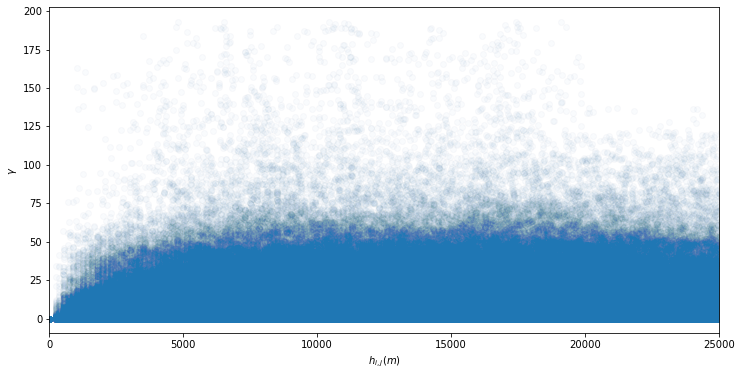

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(h,gamma,alpha=0.01)
plt.xlim([0,25000]) #only to 25000m
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$h_{i,j} (m)$',fontsize=10)
plt.ylabel(r'$\gamma$',fontsize=10)
plt.show()

#### B. bin size = 500m, plot up to 25000 m

In [13]:
size = 500
edges = np.linspace(0,20000,20000/size+1)

hd = (edges[1:] + edges[0:-1])/2

gamma_s = []
for i in range(hd.size):
    if i == 0:m = (h >= edges[i]) & (h < edges[i+1])
    else:m = (h > edges[i]) & (h <= edges[i+1])
    tmp = np.mean(gamma[m])
    gamma_s.append(tmp)
gamma_s = np.array(gamma_s)

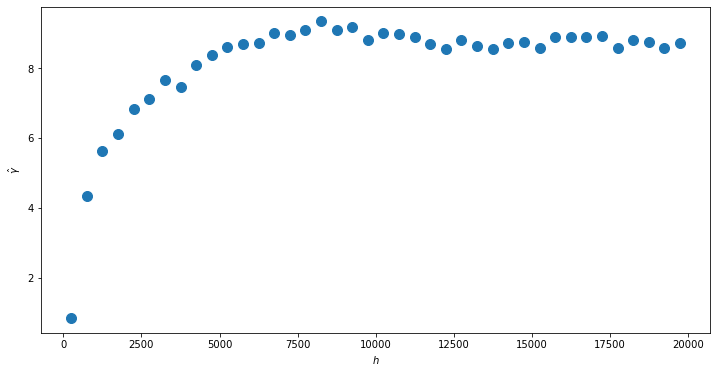

In [14]:
plt.figure(figsize=(12,6))
plt.plot(hd,gamma_s,'o',markersize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$h$',fontsize=10)
plt.ylabel(r'$\hat{\gamma}$',fontsize=10)
plt.show()

#### C.  fit exponential, spherical, and bounded linear semivariogram to sample, calculate $R^2$ and plot the graph

In [45]:
#exponential semivariogram
def es(h,c,tau):
    return c * (1 - np.exp(-h/tau))
popt, pcov = op.curve_fit(es,hd,gamma_s,bounds=([0,1000],[100,25000]))
print(r'R^2: %f' % r2_score(gamma_s, es(hd,*popt)))

R^2: 0.967159


In [46]:
#spherical semivariogram
def ss(h,c,a):
    res = []
    for h_i in h:
        if h_i <= a:
            res.append(c * (1.5*h_i/a - 0.5*h_i**3/(a**3)))
        else:
            res.append(c)
    return np.array(res)   
popt, pcov = op.curve_fit(ss,hd,gamma_s,bounds=([0,1000],[100,25000]))
print(r'R^2: %f' % r2_score(gamma_s, ss(hd,*popt)))

R^2: 0.901294


In [47]:
#bounded linear semivariogram
def bls(h,c,a):
    res = []
    for h_i in h:
        if h_i <= a:
            res.append(c * h_i / a)
        else:
            res.append(c)
    return np.array(res)
popt, pcov = op.curve_fit(bls,hd,gamma_s,bounds=([0,1000],[100,25000]))
print(r'R^2: %f' % r2_score(gamma_s, bls(hd,*popt)))

R^2: 0.853063


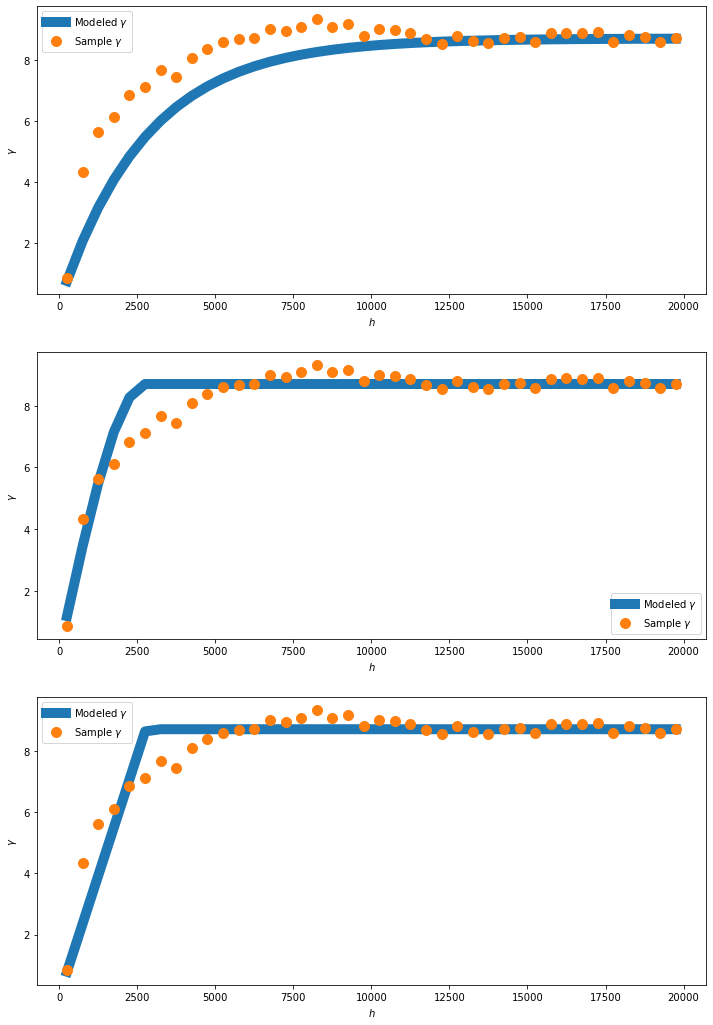

In [48]:
fig,axs=plt.subplots(3,figsize=(12,18))

axs[0].plot(hd,es(hd,*popt),lw=10)
axs[0].plot(hd,gamma_s,'o',markersize=10)
axs[0].set_xlabel(r'$h$',fontsize=10)
axs[0].set_ylabel(r'$\gamma$',fontsize=10)
axs[0].legend([r'Modeled $\gamma$',r'Sample $\gamma$'],fontsize=10)

axs[1].plot(hd,ss(hd,*popt),lw=10)
axs[1].plot(hd,gamma_s,'o',markersize=10)
axs[1].set_xlabel(r'$h$',fontsize=10)
axs[1].set_ylabel(r'$\gamma$',fontsize=10)
axs[1].legend([r'Modeled $\gamma$',r'Sample $\gamma$'],fontsize=10)

axs[2].plot(hd,bls(hd,*popt),lw=10)
axs[2].plot(hd,gamma_s,'o',markersize=10)
axs[2].set_xlabel(r'$h$',fontsize=10)
axs[2].set_ylabel(r'$\gamma$',fontsize=10)
axs[2].legend([r'Modeled $\gamma$',r'Sample $\gamma$'],fontsize=10)

Based on the $R^2$ value and the graph generated, I would like to choose expoential semivariogram.

# 3. Ordinary Kriging (25 pts)

Using the data in the samples group in '/data/HW/HW4/HW4.nc', and assumming an exponential semivariogram with a sill ($c$) of 10.0 $\%^2$, a nugget of 0, and a range ($a$) of 1500 m, do the following:

A. Use ordinary kriging to try to reproduce the original map of sand (as found in the original_data group in `/data/HW/HW4/HW4.nc`).

B. Plot the reproduced map and the original map. Compare the two via the $R^2$.

C. Compute the estimated mean squared error at each grid cell (kriging variance) and plot the map. Discuss the results. 

D. One of the largest limitations of Kriging is that the observation covariance matrix can become too large. Another more practical approach is to only use the closest $n$ points to each point to which we interpolate. Setting $n = 10$, perform this "localized" ordinary kriging and compare the results to those from part B. 

E. Repeat part D. However, this time set $n=1$. What other deterministic spatial interpolation method does this now mimic?

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy.optimize as op
import xarray as xr
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import r2_score

#### A. reproduce original map

In [50]:
fp=xr.open_rasterio('/data/HW/HW4/HW4.nc')
data = np.array(fp[0,:,:])
x = np.array(fp['x'][:])
y = np.array(fp['y'][:])

/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [51]:
samples = int(0.1*(x.size*y.size))
np.random.seed(1)
(xs,ys) = np.meshgrid(np.arange(x.size), np.arange(y.size))
ipoints = np.random.choice(np.arange(x.size*y.size), samples, replace=False)
ix = xs.ravel()[ipoints]
iy = ys.ravel()[ipoints]
x_points = x[ix]
y_points = y[iy]
data_points = []
for i in range(iy.size):
    data_points.append(data[iy[i],ix[i]])
data_points = np.array(data_points)

In [53]:
#sill
c = 10
#range
a = 1500
#grid
x_grid = x[xs]
y_grid = y[ys]
# Reshape
xg1d = x_grid.reshape(x_grid.size)
yg1d = y_grid.reshape(y_grid.size)
# euclidean distances (observ - points)
dist = ((xg1d[:,np.newaxis] - x_points.T)**2 + (yg1d[:,np.newaxis] - y_points.T)**2)**0.5
#covariance matrix
C = c*np.exp(-dist/a).T
# euclidean distances (observ - observ)
dist = ((x_points[:,np.newaxis] - x_points.T)**2 + (y_points[:,np.newaxis] - y_points.T)**2)**0.5
#covariance matrix Sigma
Sigma = c*np.exp(-dist/a).T
# Sigma_prime
Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))
Sigma_prime[0:-1,0:-1] = Sigma[:]
Sigma_prime[-1,0:-1] = 1
Sigma_prime[0:-1,-1] = 1
# C_prime
C_prime = np.zeros((C.shape[0]+1,C.shape[1]))
C_prime[0:-1,:] = C[:,:]
C_prime[-1,:] = 1

In [54]:
# weights
W = np.linalg.solve(Sigma_prime,C_prime)
# zstar
zt = data_points[:]
zstar = np.sum(W[0:-1,:]*zt[:,np.newaxis],axis=0)

#### B. plot both map, compare via $R^2$

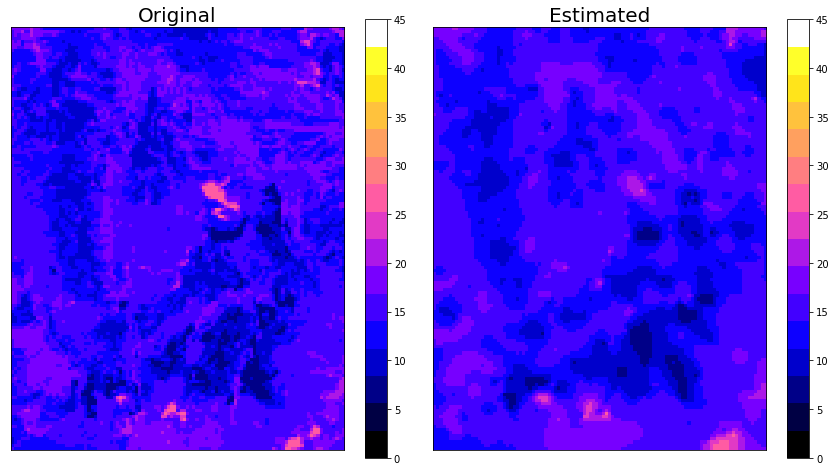

In [57]:
vmin = 0
vmax = 45

ypred = zstar.reshape(x_grid.shape)
plt.figure(figsize=(12,9))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)
plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Original',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

In [58]:
# R^2
print(r'R2: %f' % r2_score(data.reshape(data.size),ypred.reshape(ypred.size)))

R2: 0.602772


#### C. compute $\sqrt{MSE}$, plot and discuss

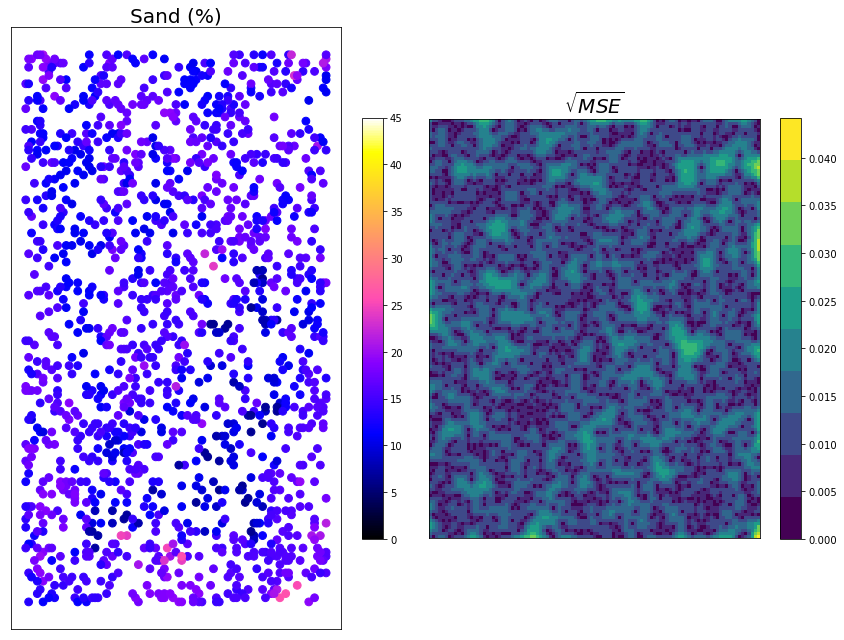

In [62]:
mse = c - np.sum(W[0:-1,:]*C_prime[0:-1,:],axis=0) - W[-1,:]

mse_grid = mse.reshape(x_grid.shape)
plt.figure(figsize=(12,9))
plt.subplot(122)
plt.imshow(mse_grid,cmap=cm.get_cmap('viridis',10))
plt.xticks([])
plt.yticks([])
plt.title(r'$\sqrt{MSE}$',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)
plt.subplot(121)
plt.scatter(ix,np.max(iy)-iy,c=data_points,s=60,vmin=vmin,vmax=vmax,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

When there is a data point, MSE value becomes lower. When there's no observing points, MSE value become larger.

#### D. n=10, perform "localized" ordinary kriging and compare the results to part B

In [64]:
n = 10
# euclidean distances (observ - point)
dist = ((xg1d[:,np.newaxis] - x_points.T)**2 + (yg1d[:,np.newaxis] - y_points.T)**2)**0.5
# the nearest n neighbors
obs_nn_dist = np.sort(dist, axis=1)[:,:n]
obs_nn_idx = np.argsort(dist, axis=1)[:,:n]

In [66]:
Zstar = []
for i in tqdm(range(len(obs_nn_dist)),position=0,leave=True):
    # distance between n nearest obs and the pixel
    h_pixel = obs_nn_dist[i][:,np.newaxis]
    C = c*np.exp(-h_pixel/a) # covariance matrix C
    C_prime = np.zeros((C.shape[0]+1,C.shape[1])) # C_prime
    C_prime[0:-1,:] = C[:,:]
    C_prime[-1,:] = 1
    # distance between 10 nearest obs
    x_obs, y_obs = x_points[obs_nn_idx[i]], y_points[obs_nn_idx[i]]
    h_obs = ((x_obs[:,np.newaxis] - x_obs.T)**2 + (y_obs[:,np.newaxis] - y_obs.T)**2)**0.5
    Sigma = c*np.exp(-h_obs/a).T   # covariance matrix Sigma
    Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))  # Sigma_prime
    Sigma_prime[0:-1,0:-1] = Sigma[:]
    Sigma_prime[-1,0:-1] = 1
    Sigma_prime[0:-1,-1] = 1
    W = np.linalg.solve(Sigma_prime,C_prime)  # weights
    zt = data_points[obs_nn_idx[i]]   #zstar
    zstar = np.sum(W[0:-1,:]*zt[:,np.newaxis],axis=0)
    Zstar.append(zstar)

100%|██████████| 13965/13965 [00:01<00:00, 9614.17it/s]


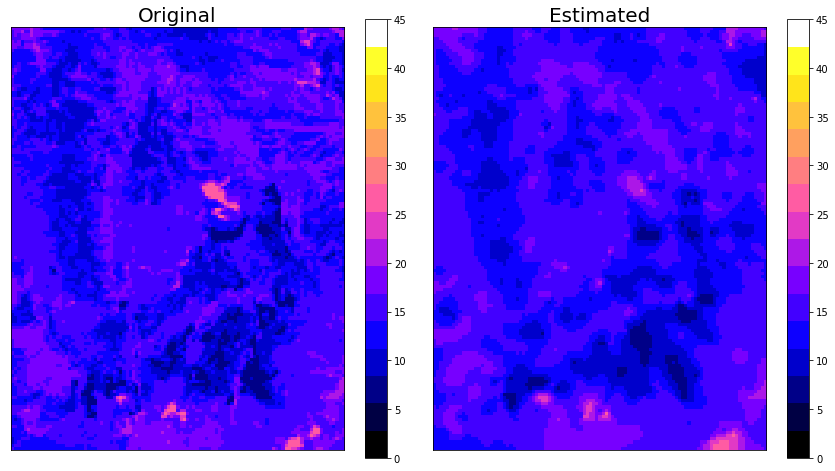

R2: 0.602709


In [68]:
vmin = 0
vmax = 45

Zstar = np.array(Zstar)
ypred = Zstar.reshape(x_grid.shape)
plt.figure(figsize=(12,9))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)

plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Original',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

# R^2
print(r'R2: %f' % r2_score(data.reshape(data.size),ypred.reshape(ypred.size)))

Part D result compare to part B is very similiar. 

$R^2$ value for part D is 0.6027, which is alsoo close to the 0.6028 value from part B.

#### E. n=1, perform "localized" ordinary kriging and compare the results to part B. What other deterministic spatial interpolation method does this now mimic

In [69]:
#redo everything from part d but change n = 1
n = 1
# euclidean distances (observ - point)
dist = ((xg1d[:,np.newaxis] - x_points.T)**2 + (yg1d[:,np.newaxis] - y_points.T)**2)**0.5
# the nearest n neighbors
obs_nn_dist = np.sort(dist, axis=1)[:,:n]
obs_nn_idx = np.argsort(dist, axis=1)[:,:n]

In [72]:
Zstar = []
for i in tqdm(range(len(obs_nn_dist)),position=0,leave=True):
    # distance between n nearest obs and the pixel
    h_pixel = obs_nn_dist[i][:,np.newaxis]
    C = c*np.exp(-h_pixel/a) # covariance matrix C
    C_prime = np.zeros((C.shape[0]+1,C.shape[1])) # C_prime
    C_prime[0:-1,:] = C[:,:]
    C_prime[-1,:] = 1
    # distance between 10 nearest obs
    x_obs, y_obs = x_points[obs_nn_idx[i]], y_points[obs_nn_idx[i]]
    h_obs = ((x_obs[:,np.newaxis] - x_obs.T)**2 + (y_obs[:,np.newaxis] - y_obs.T)**2)**0.5
    Sigma = c*np.exp(-h_obs/a).T   # covariance matrix Sigma
    Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))  # Sigma_prime
    Sigma_prime[0:-1,0:-1] = Sigma[:]
    Sigma_prime[-1,0:-1] = 1
    Sigma_prime[0:-1,-1] = 1
    W = np.linalg.solve(Sigma_prime,C_prime)  # weights
    zt = data_points[obs_nn_idx[i]]   #zstar
    zstar = np.sum(W[0:-1,:]*zt[:,np.newaxis],axis=0)
    Zstar.append(zstar)

100%|██████████| 13965/13965 [00:01<00:00, 10440.51it/s]


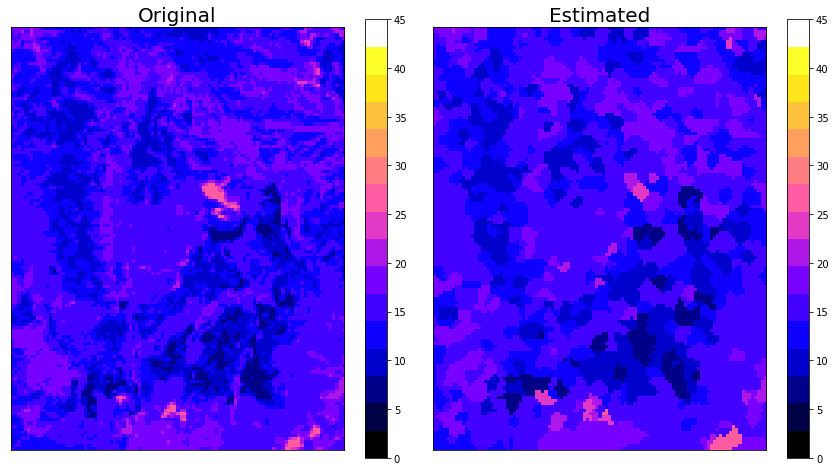

R2: 0.405897


In [73]:
vmin = 0
vmax = 45

Zstar = np.array(Zstar)
ypred = Zstar.reshape(x_grid.shape)
plt.figure(figsize=(12,9))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)

plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Original',fontsize=20)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

# R^2
print(r'R2: %f' % r2_score(data.reshape(data.size),ypred.reshape(ypred.size)))

When n=1, the $R^2$ value becomes lower and the result mimics the Nearest Neighbor spatial interpolation method.

# 4. Calculate upslope drainage area (25 pts)

Using the elevation data found in `/data/HW/HW4/mtdiablo_dem_sf.tif`, show that the upslope drainage area flowing out of the grid cell point i = 582 and j = 779 is 12,856,300 $m^2$. You will need to write up your own recursive algorithm to estimate upslope drainage area for this problem. You will want to use the d8 flow direction approach. In other words, assume that if a ball is dropped on a given grid cell it will follow the path of steepest descent (i.e., the highest slope) to one (and only one) adjacent cell. Note that the pixel size is 10 meters by 10 meters. Furthermore, you may assume that this data has already been sink-filled.